Proyecto de Herramientas para Ciencia de Datos II
============

***Sistema de Diagnóstico de la Diabetes mediante Machine Learning*** \
**Autores:**
- *Henri Gerard Gabert Hidalgo - B93096*
- *José Eduardo López Corella - C24343*
- *Juan Pablo Morgan Sandí - C15319*

# Librerías

A continuación se procede a importar las clases desde el archivo `Modelos.py` y `LecturaDeDatos.py` que se utilizarán para la ejecución de los algoritmos propuestos. Además, se importará una librería con el fin de tratar algunas advertencias que no se desean mostrar.

In [5]:
# Tratamiento de advertencias

import warnings
warnings.filterwarnings('ignore')

# Nuestras clases
from cod.LecturaDeDatos import *


# Lectura de datos

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [25]:
pd.set_option('display.max_columns', None)
X.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0


In [15]:
# Mostrar información de los datos
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [29]:

X[[X.columns[2], X.columns[-1]]].describe()

,age,absences
count,649.000000,649.000000
mean,16.744222,3.659476
std,1.218138,4.640759
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,2.000000
75%,18.000000,6.000000
max,22.000000,32.000000


In [30]:
y.describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


<Figure size 1000x600 with 0 Axes>

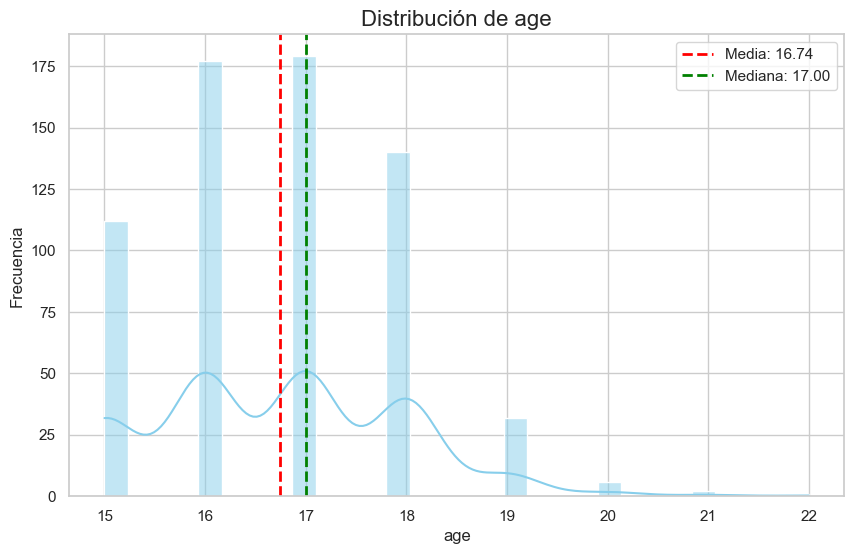

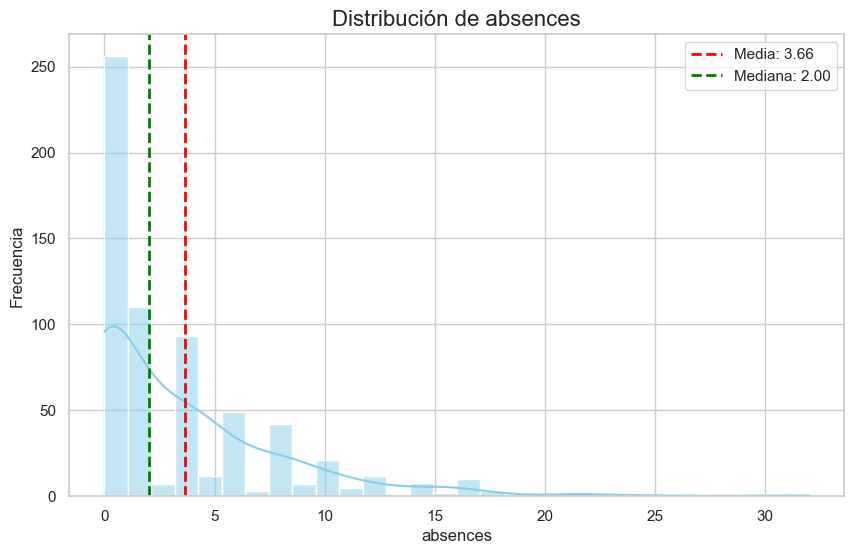

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que tus datos están en un DataFrame llamado 'df'
# Cambia 'data.csv' por tu archivo de datos o tu fuente de datos


# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# LISTA DE VARIABLES CUANTITATIVAS (reemplaza con tus variables reales)
variables_cuantitativas = ['age', 'absences']

# Función para crear gráfico de distribución para una variable
def grafico_distribucion(variable):
    plt.figure(figsize=(10, 6))
    
    # Histograma + KDE
    sns.histplot(X[variable], kde=True, color='skyblue', bins=30)
    
    # Añadir línea de media
    mean_val = X[variable].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {mean_val:.2f}')
    
    # Añadir línea de mediana
    median_val = X[variable].median()
    plt.axvline(median_val, color='green', linestyle='--', linewidth=2, 
                label=f'Mediana: {median_val:.2f}')
    
    # Personalización
    plt.title(f'Distribución de {variable}', fontsize=16)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    plt.show()

# Ejemplo de uso (para cada variable)
for variable in variables_cuantitativas:
    grafico_distribucion(variable)

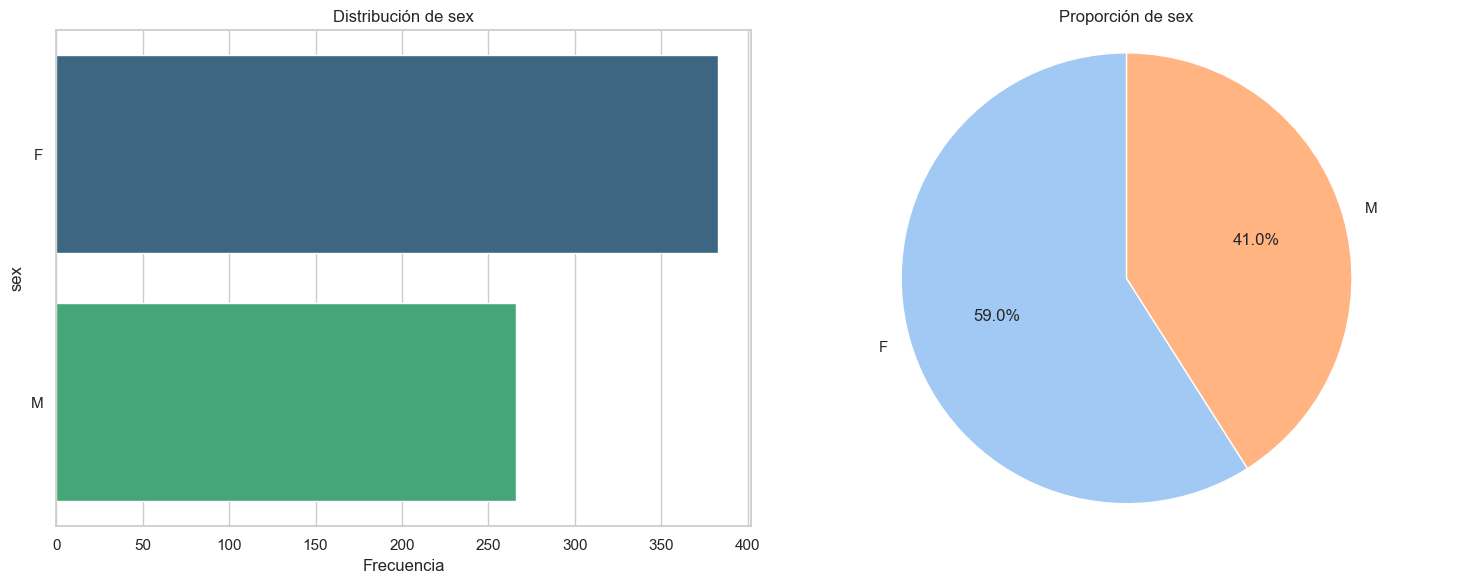

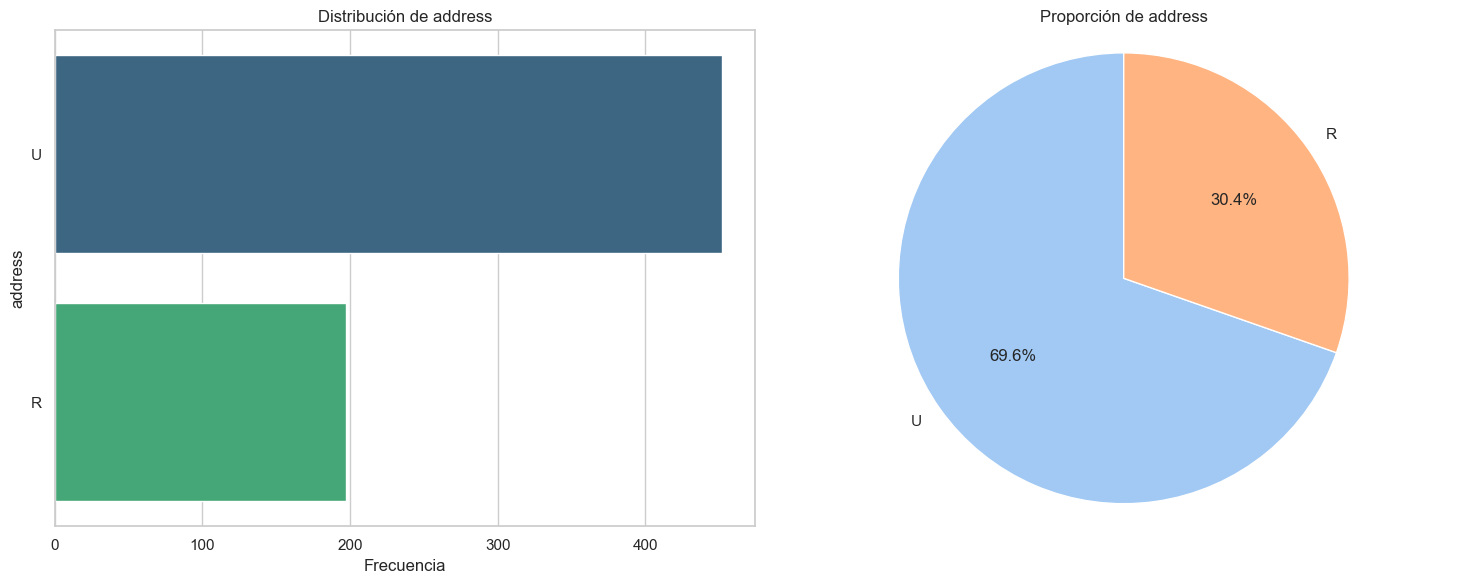

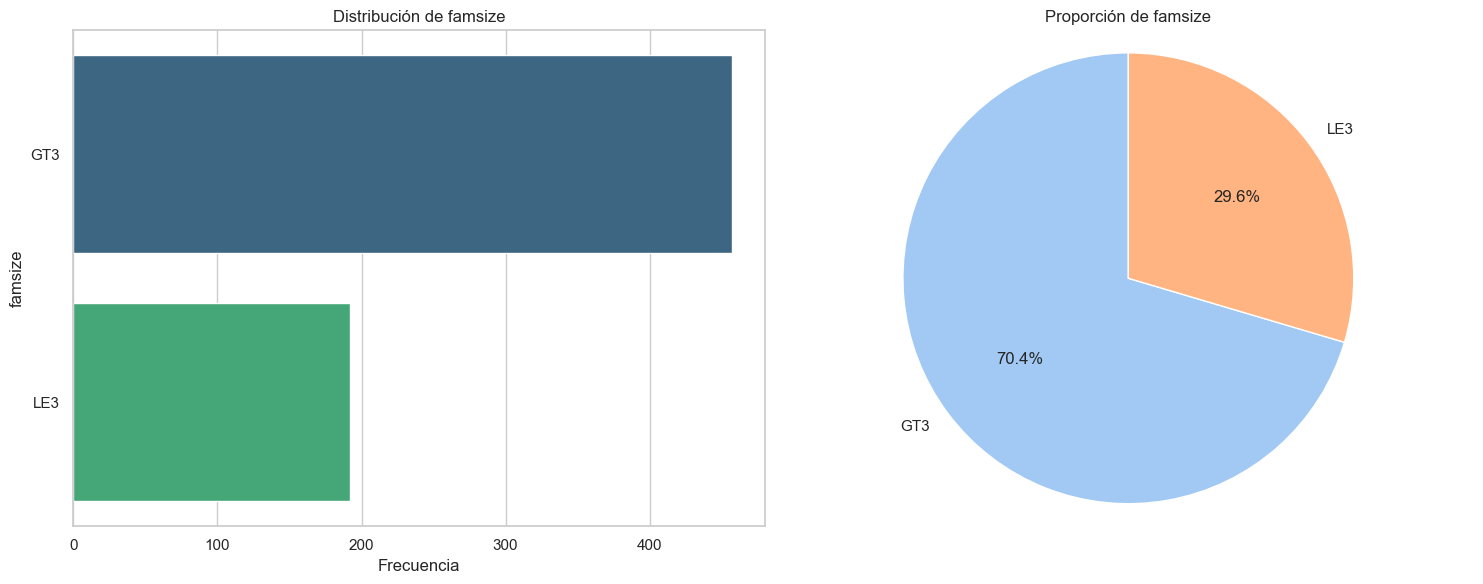

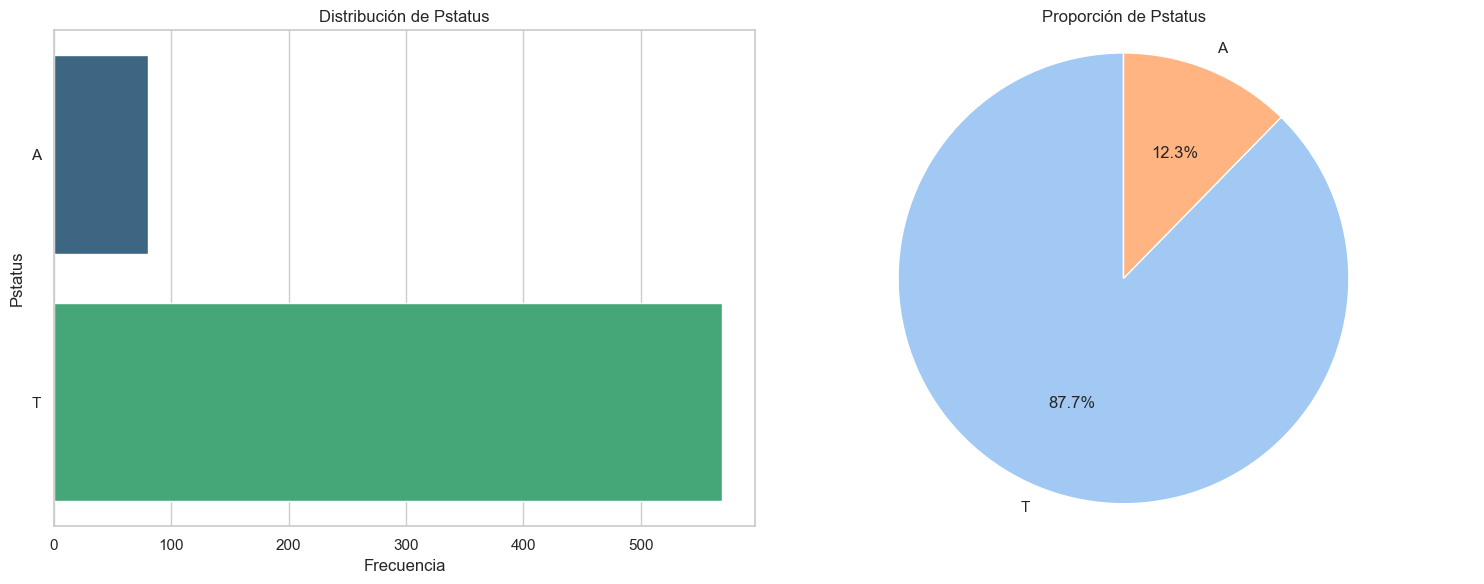

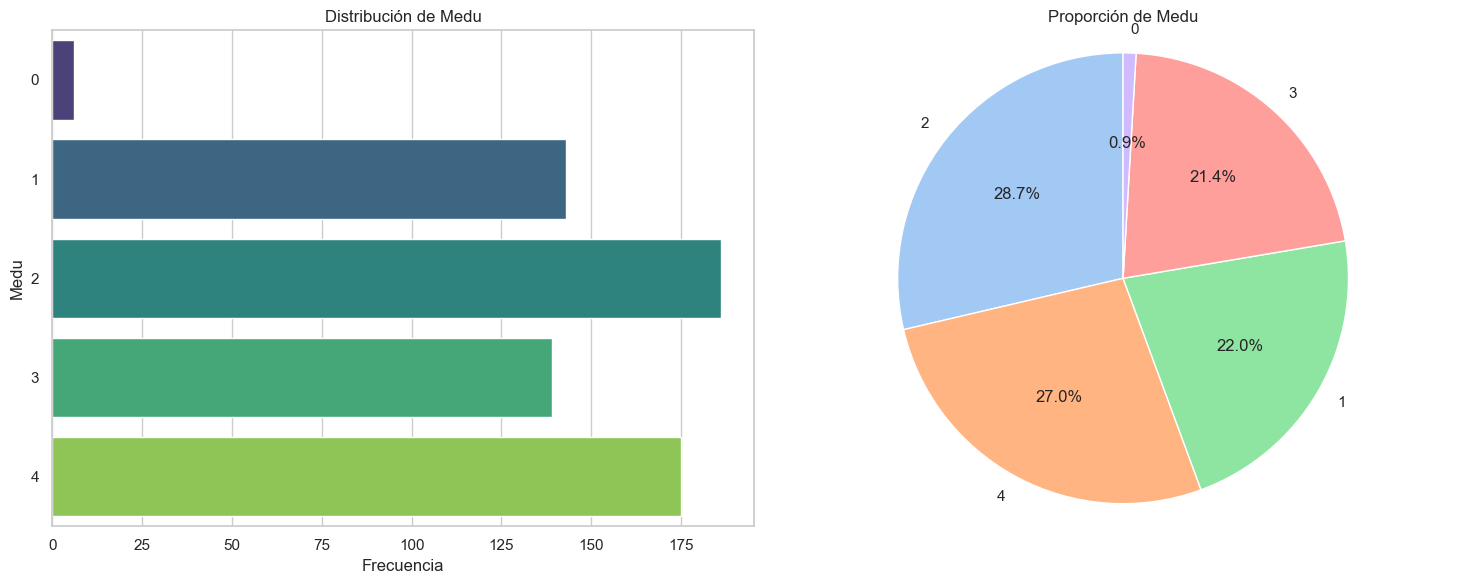

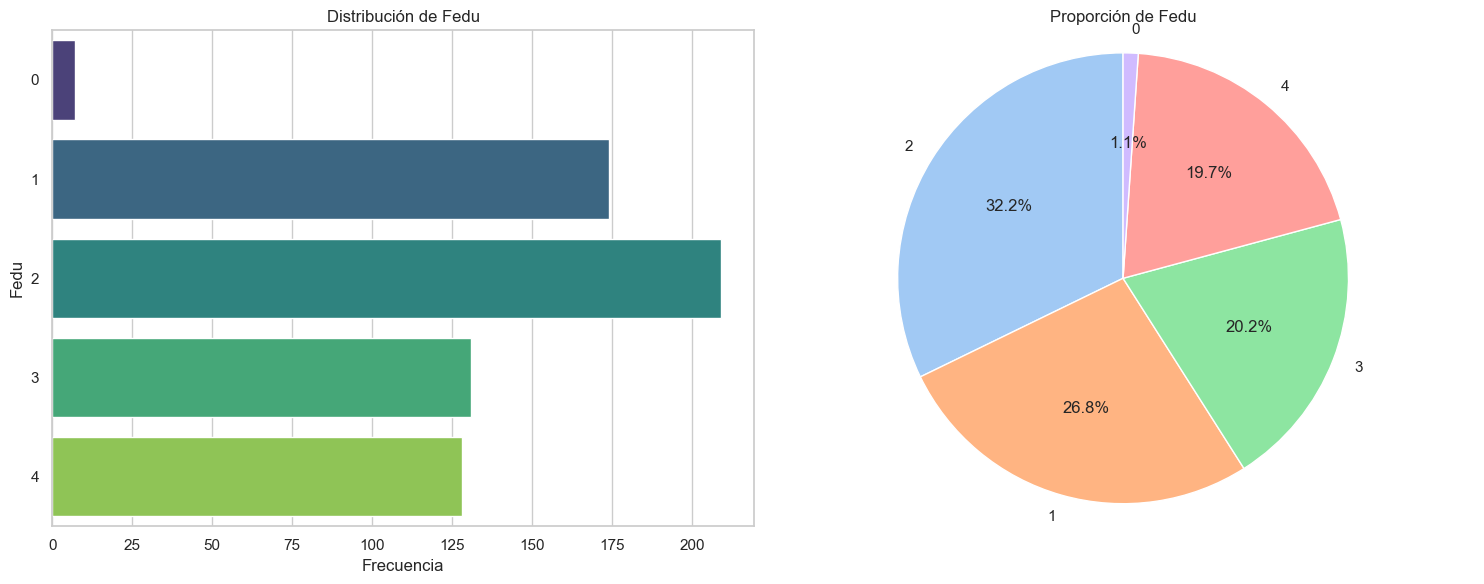

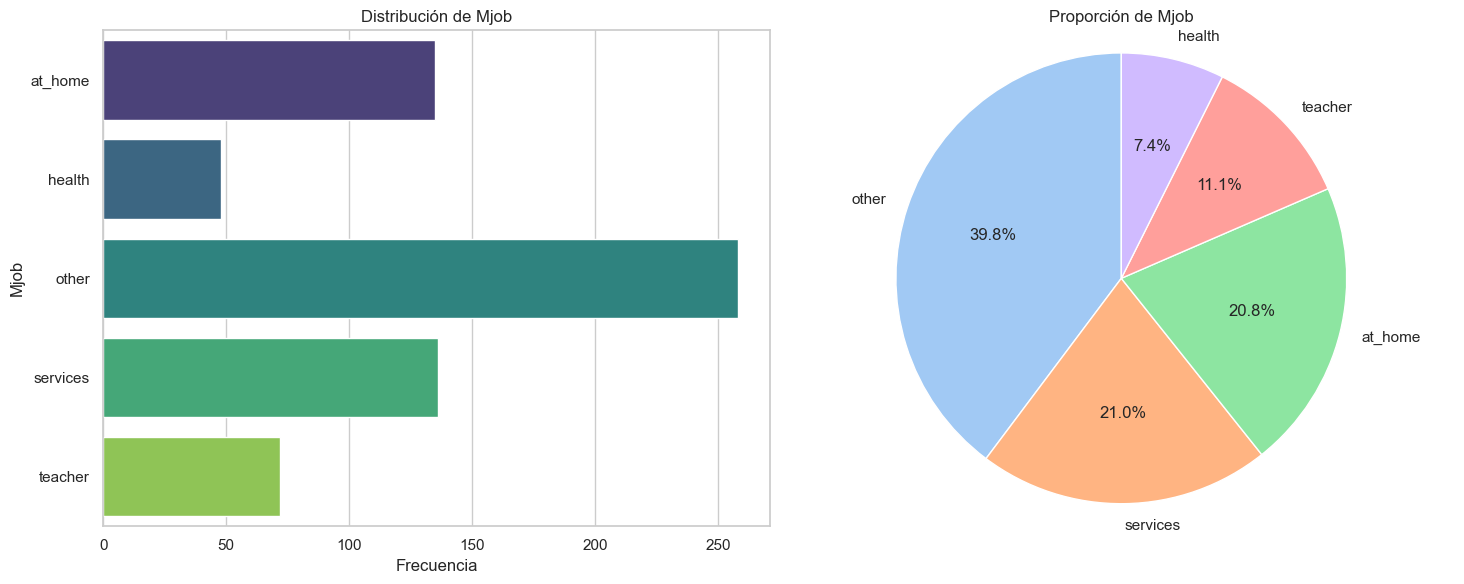

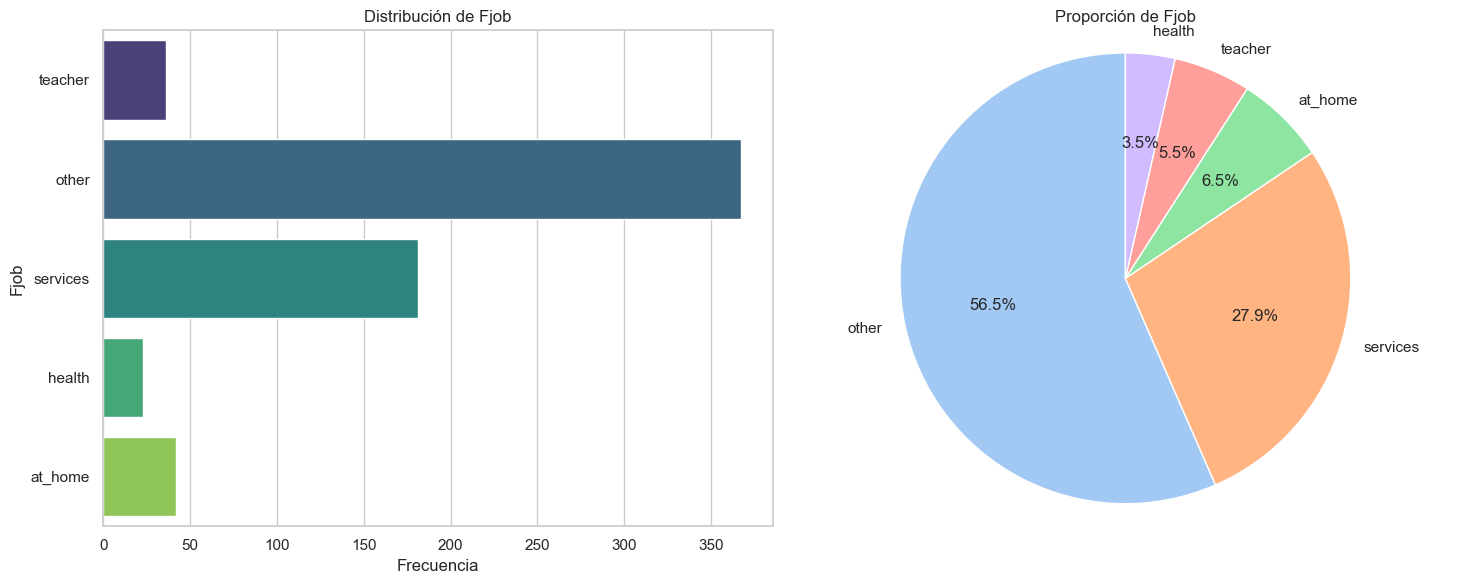

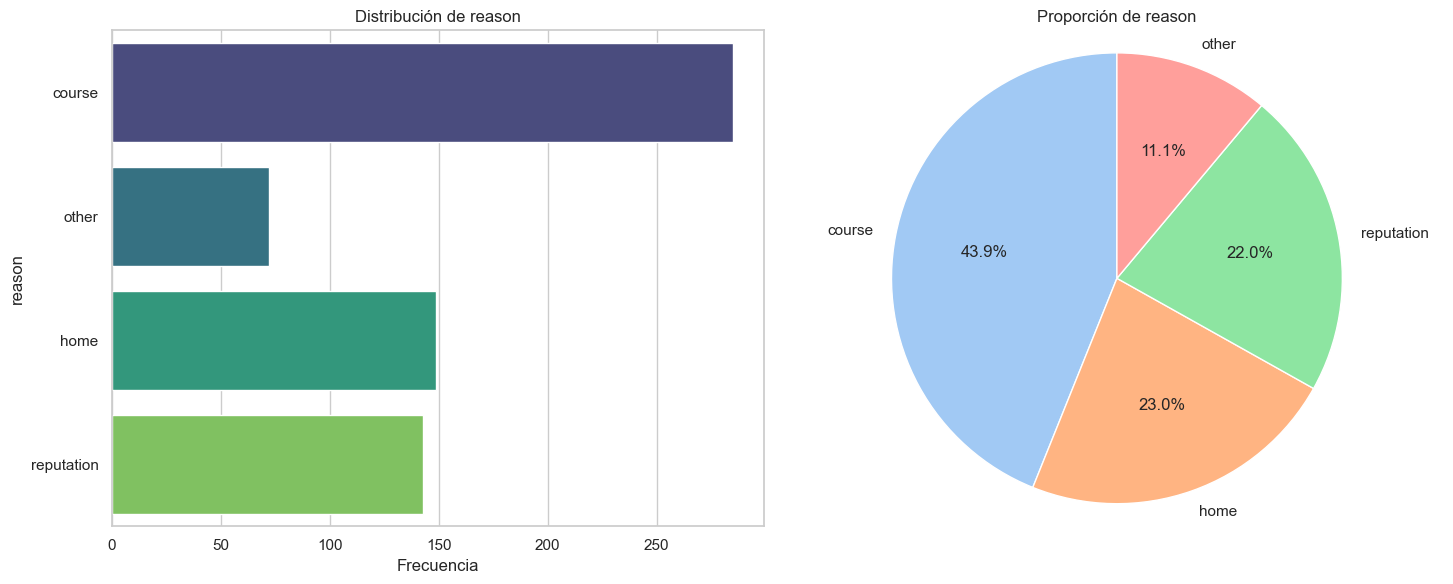

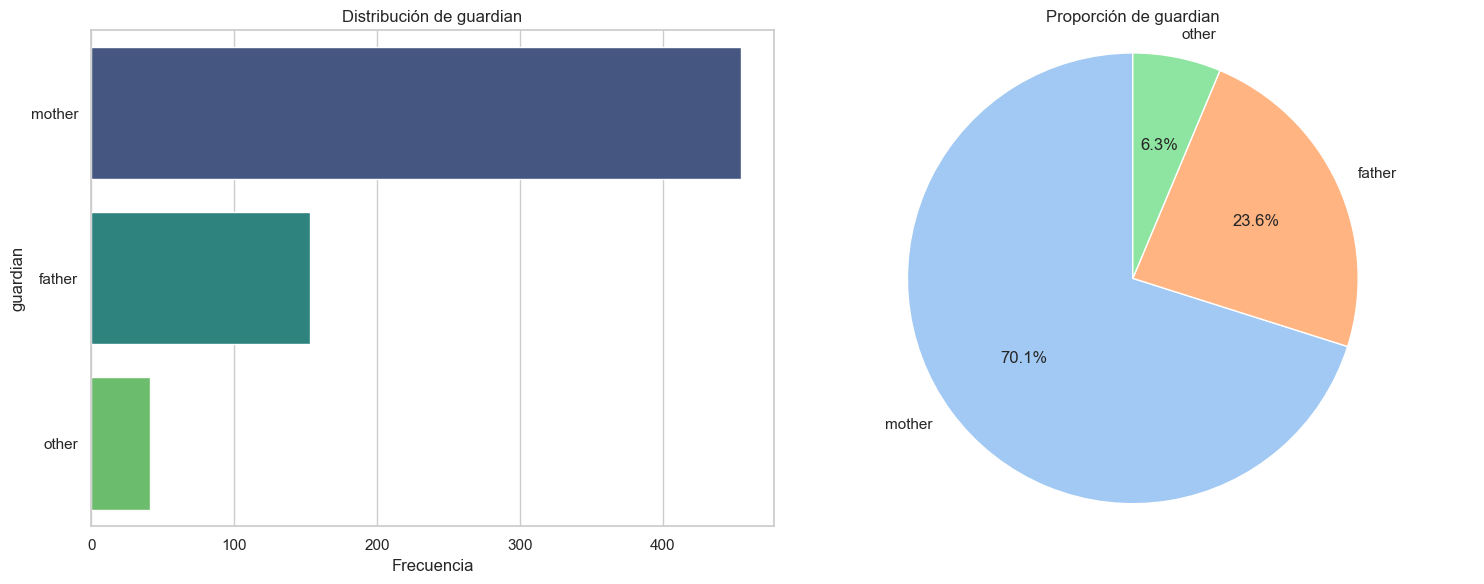

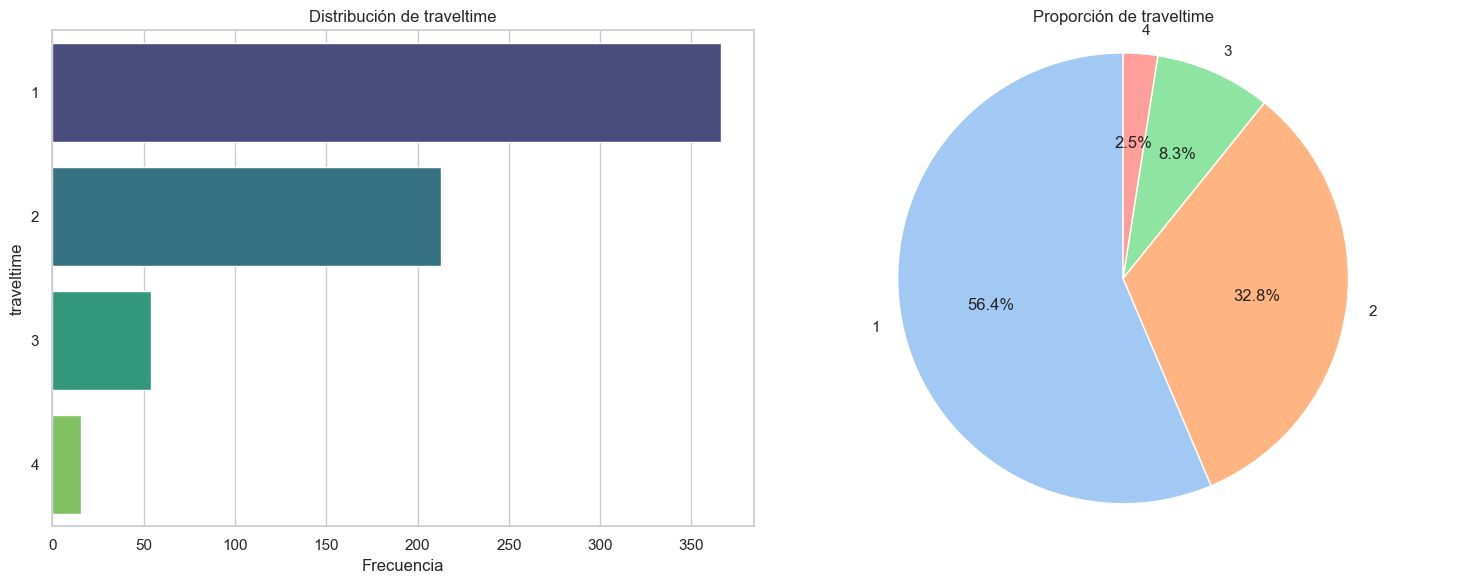

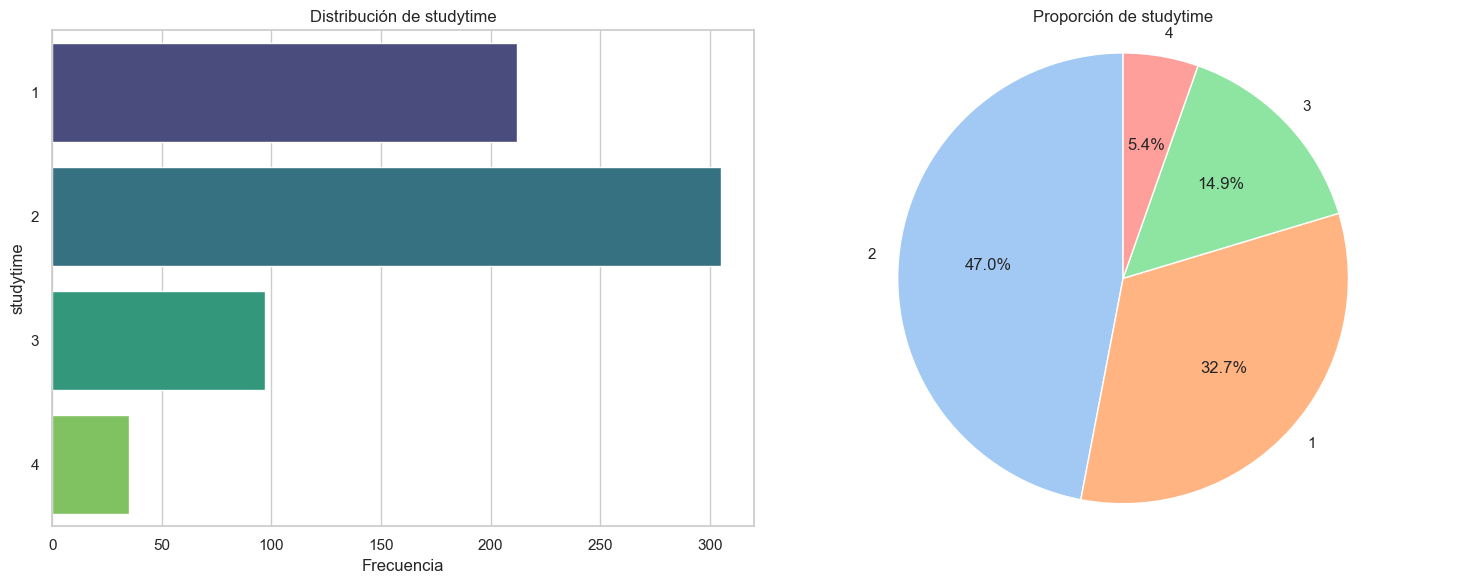

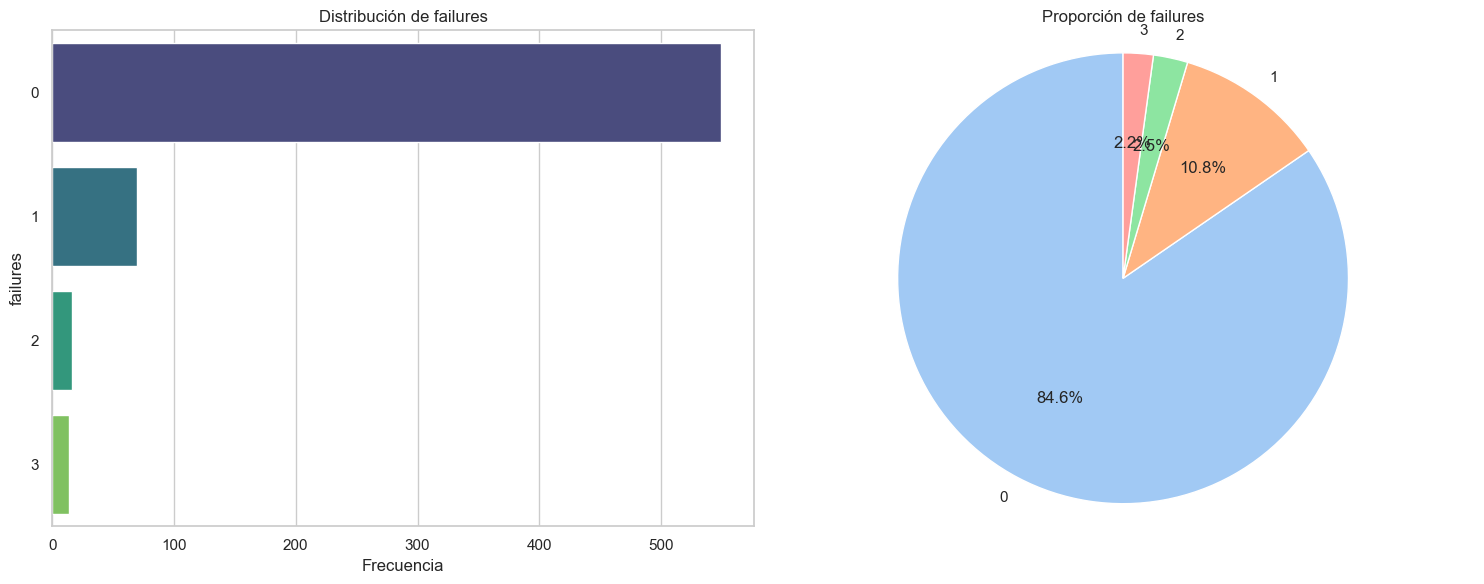

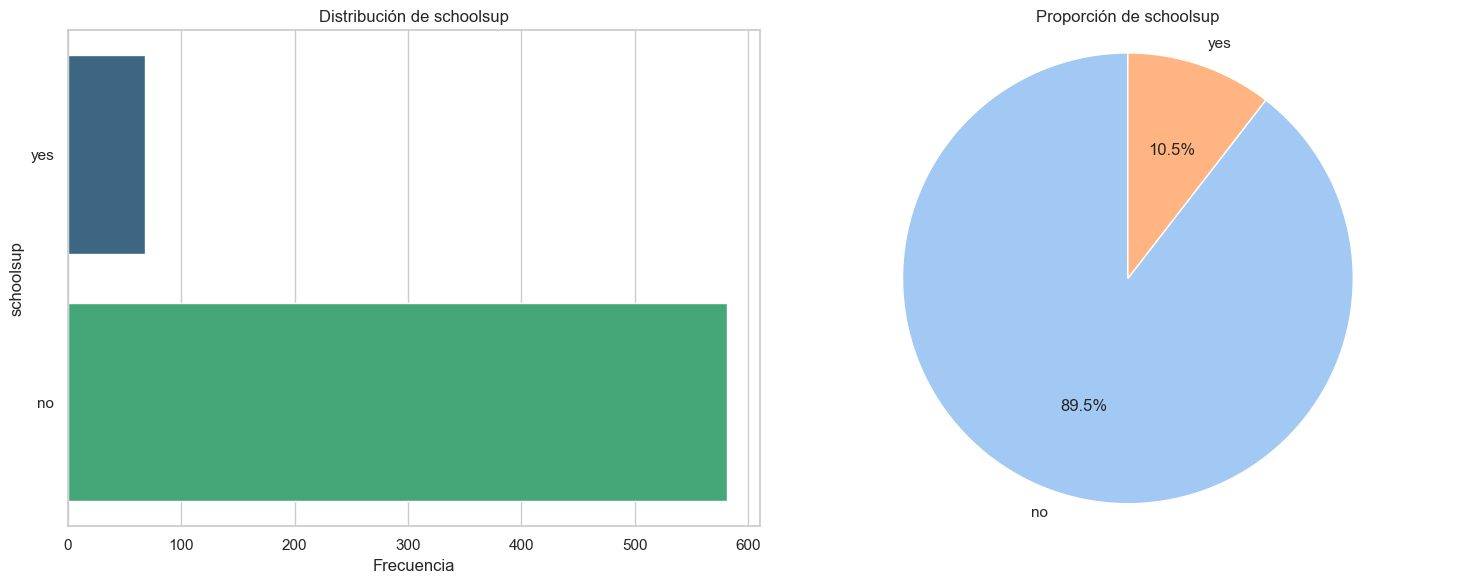

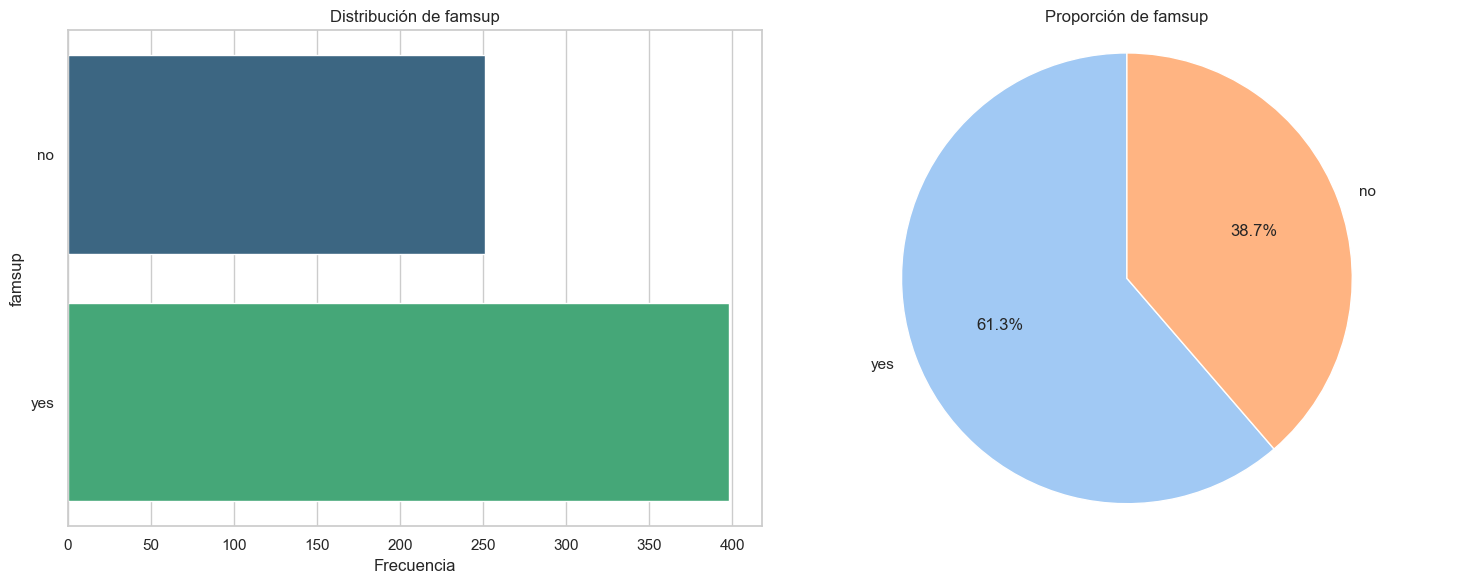

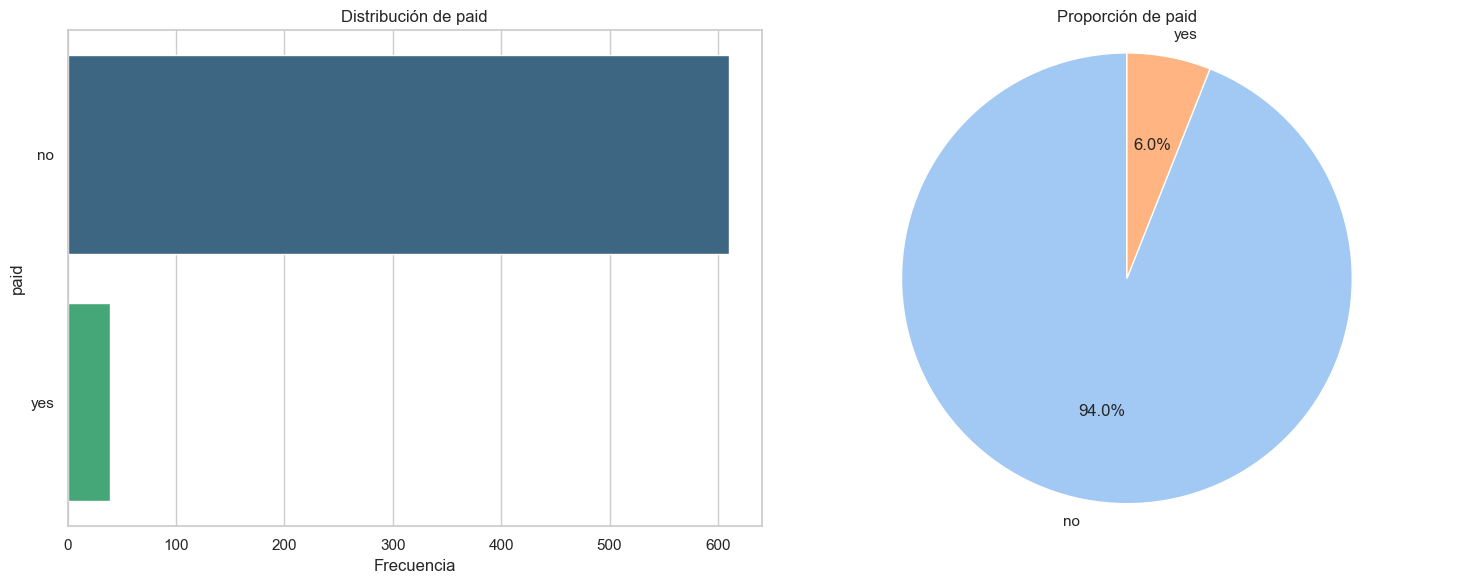

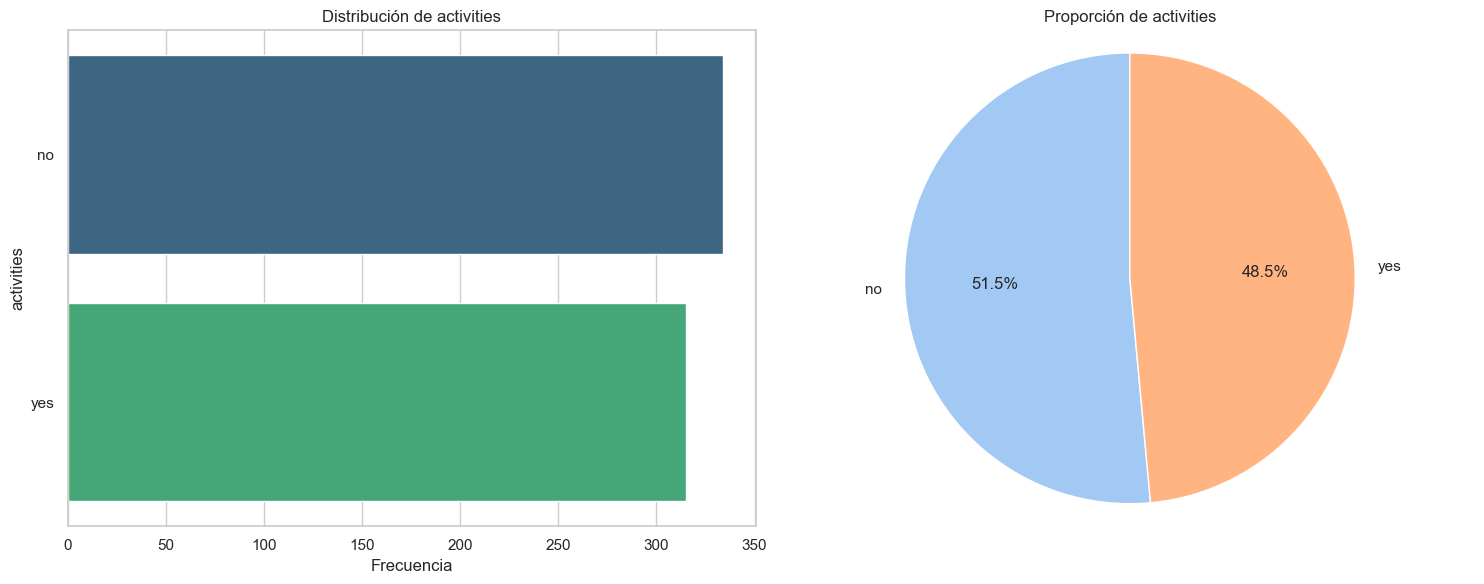

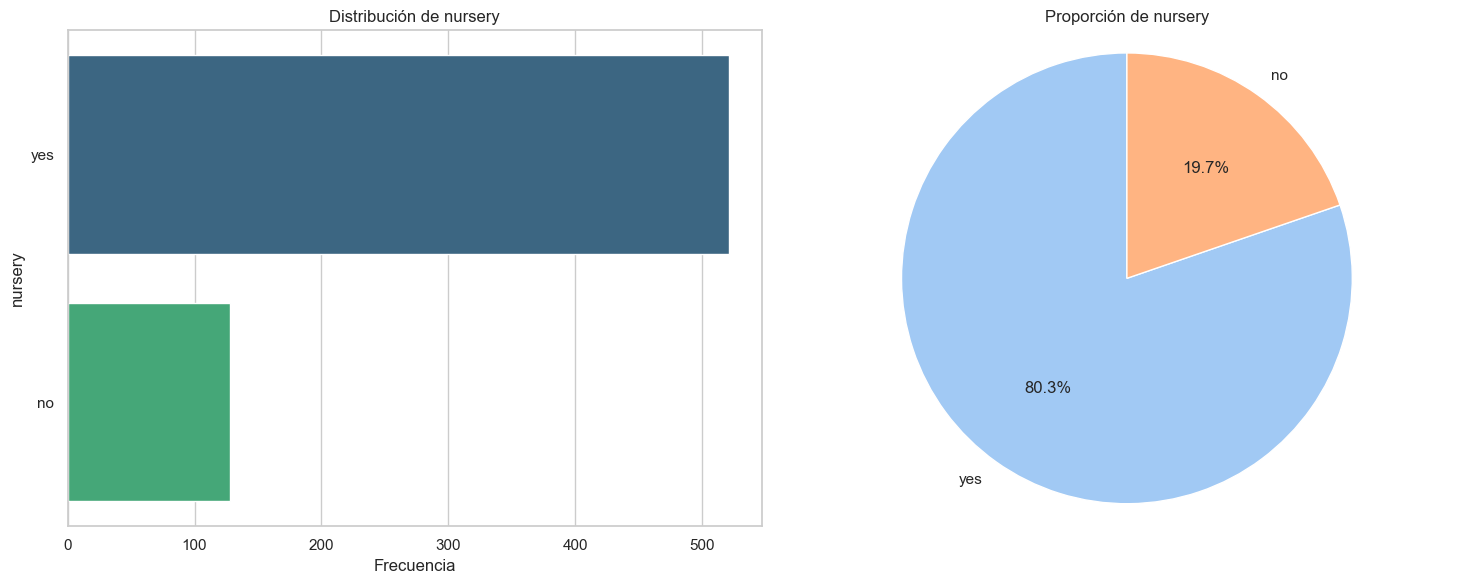

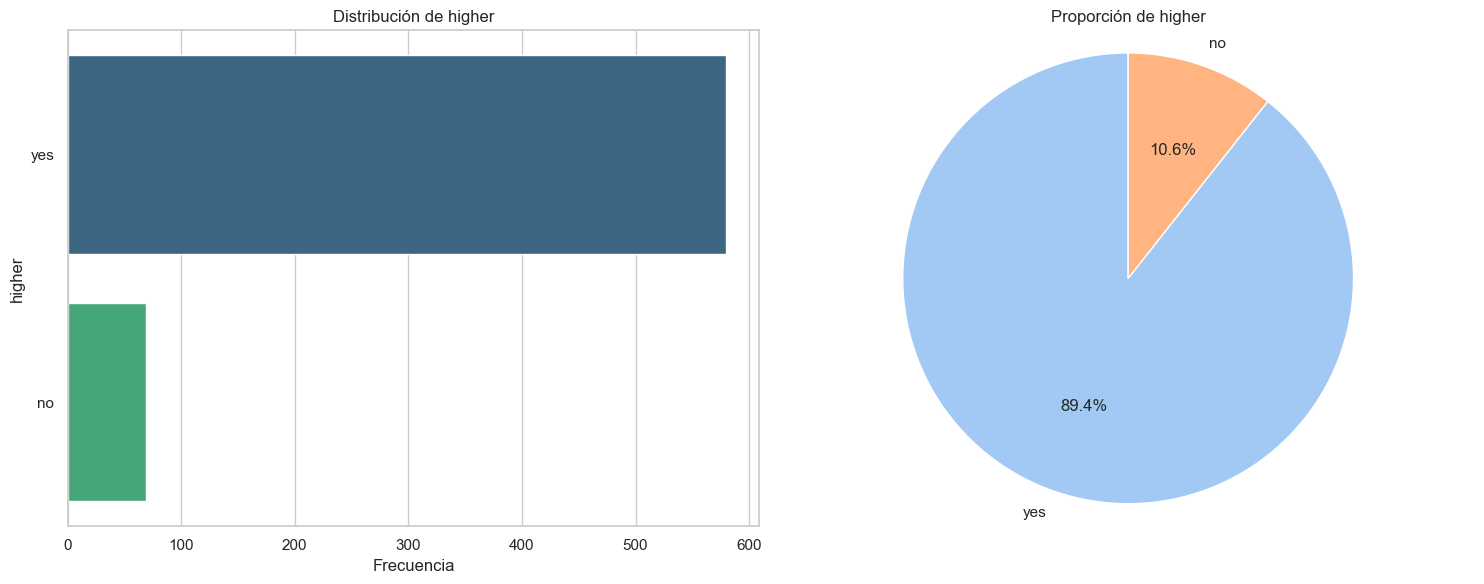

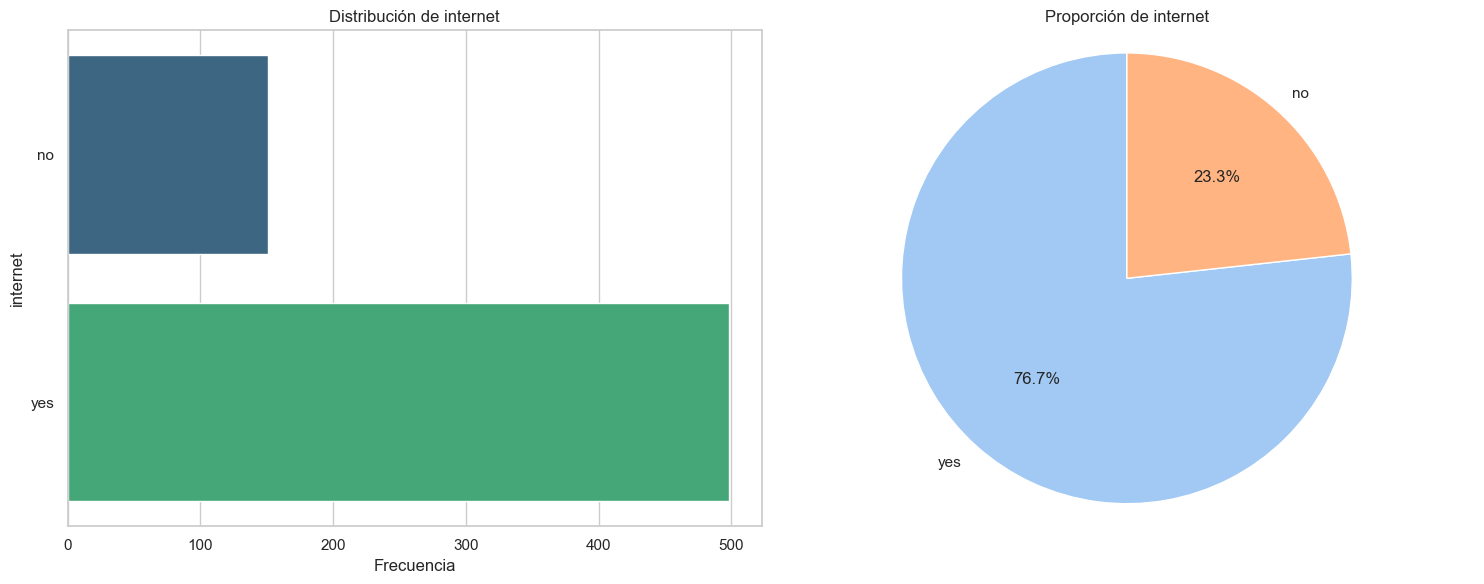

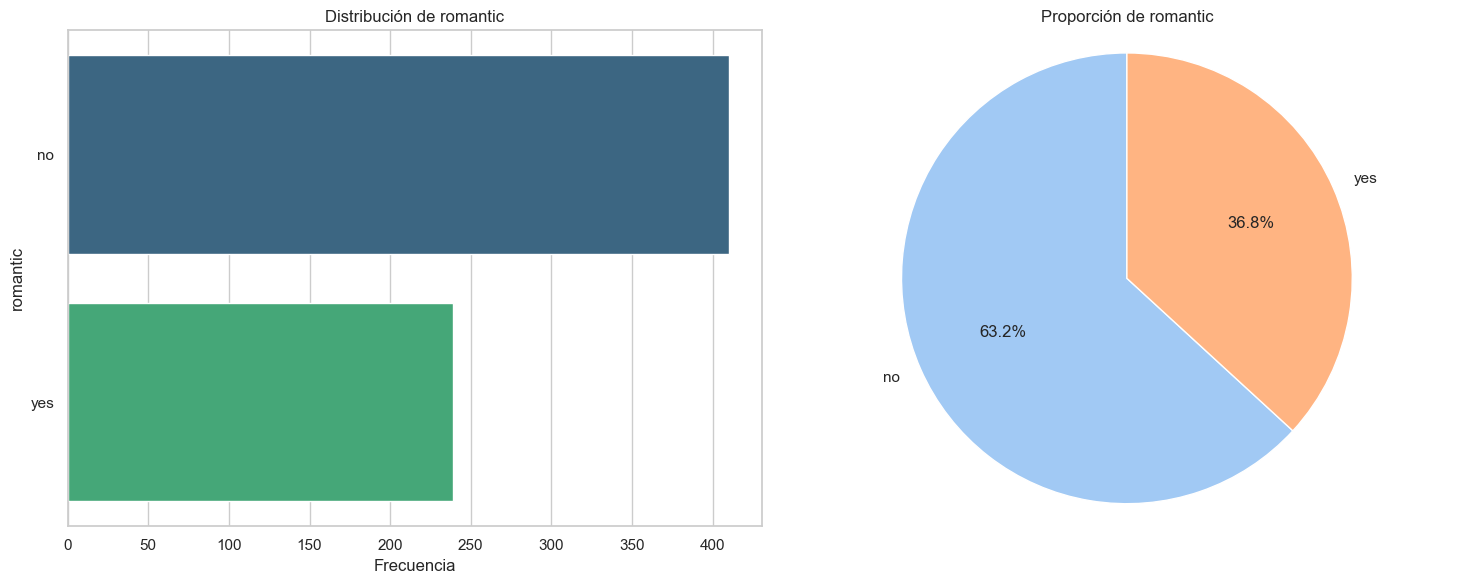

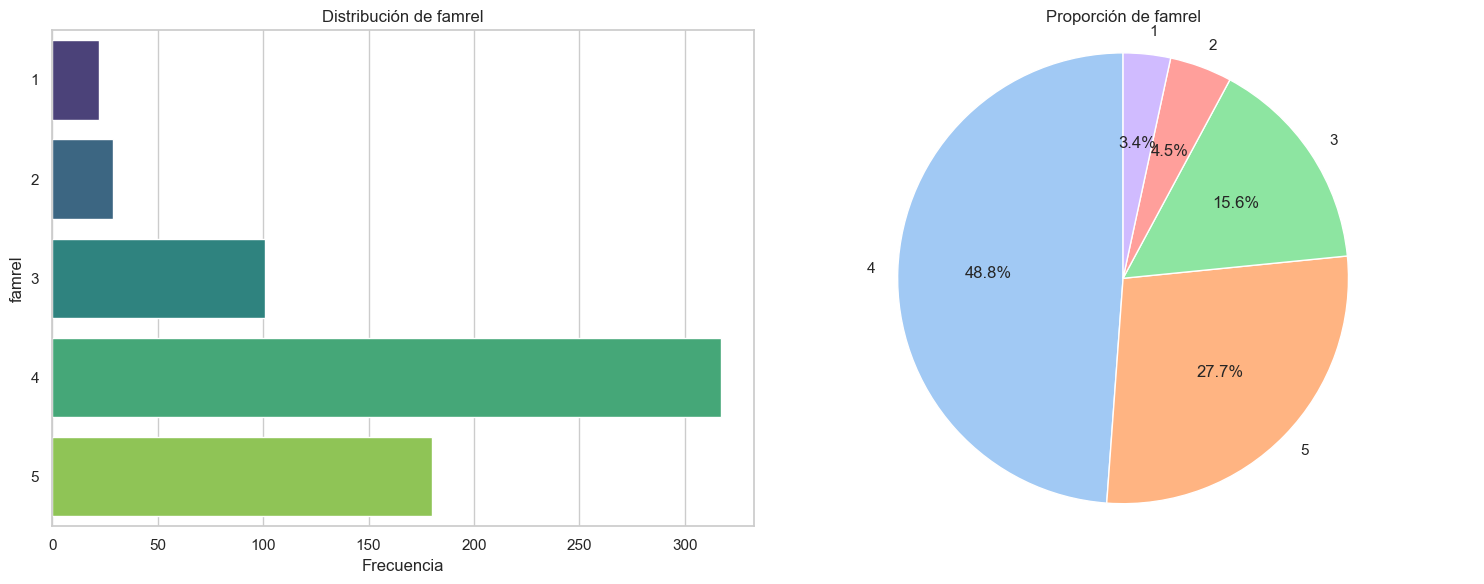

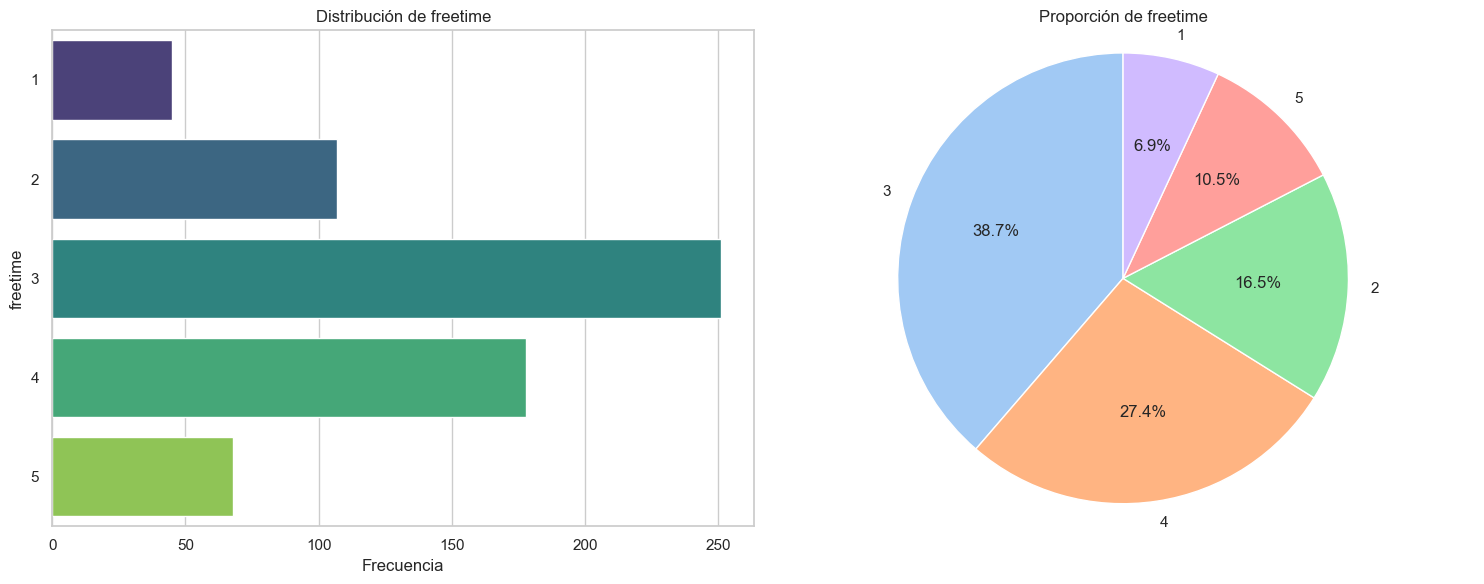

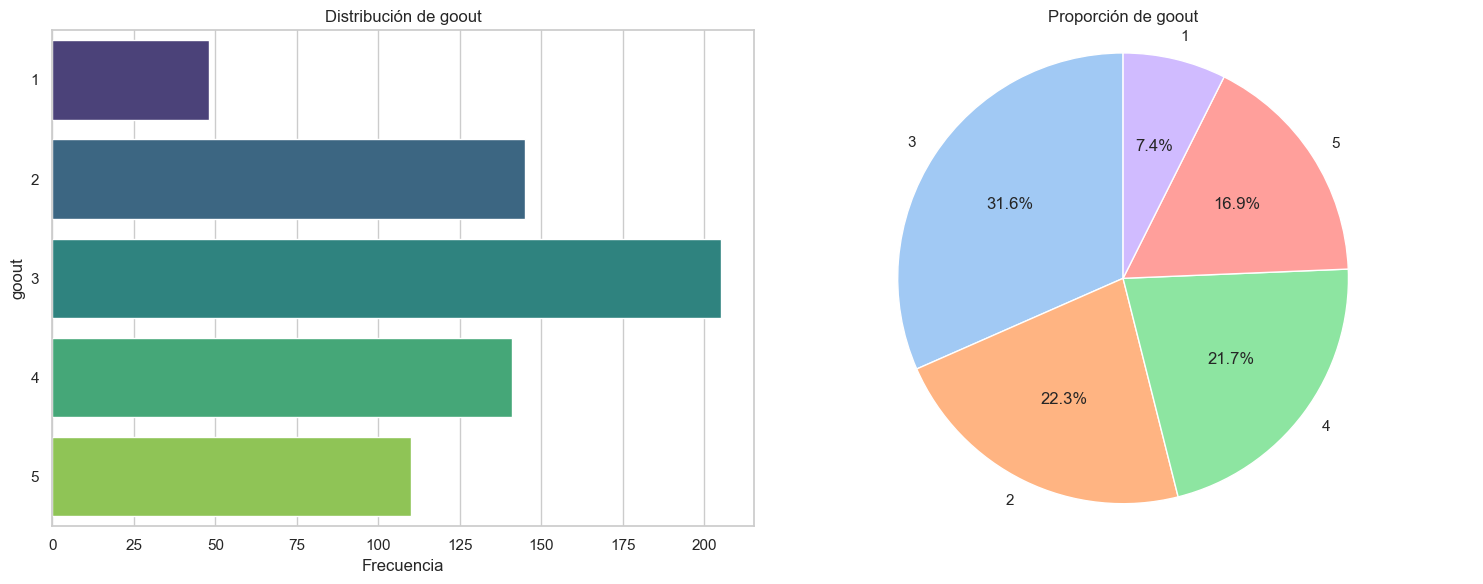

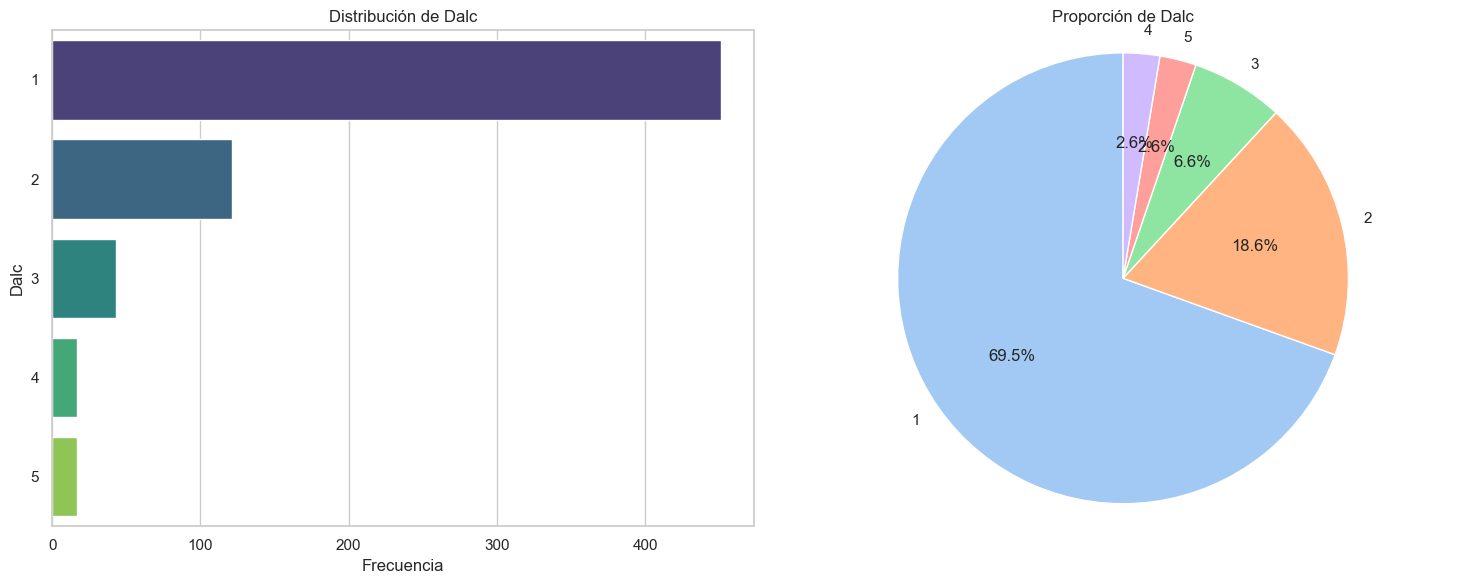

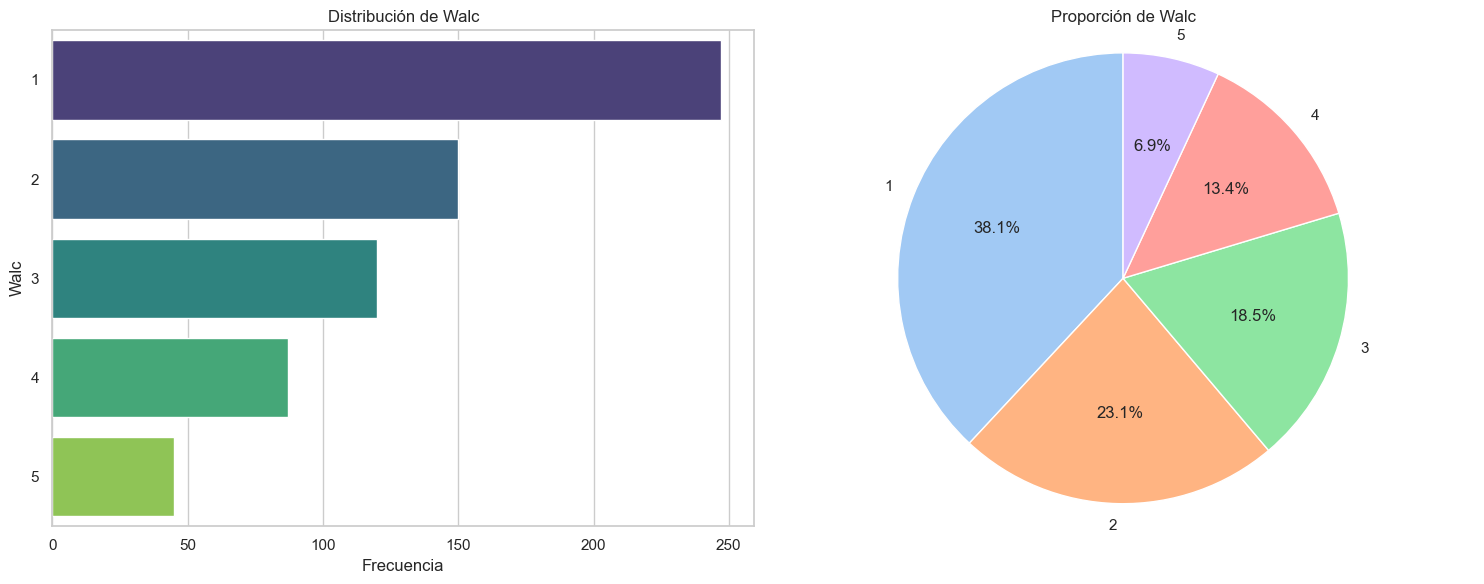

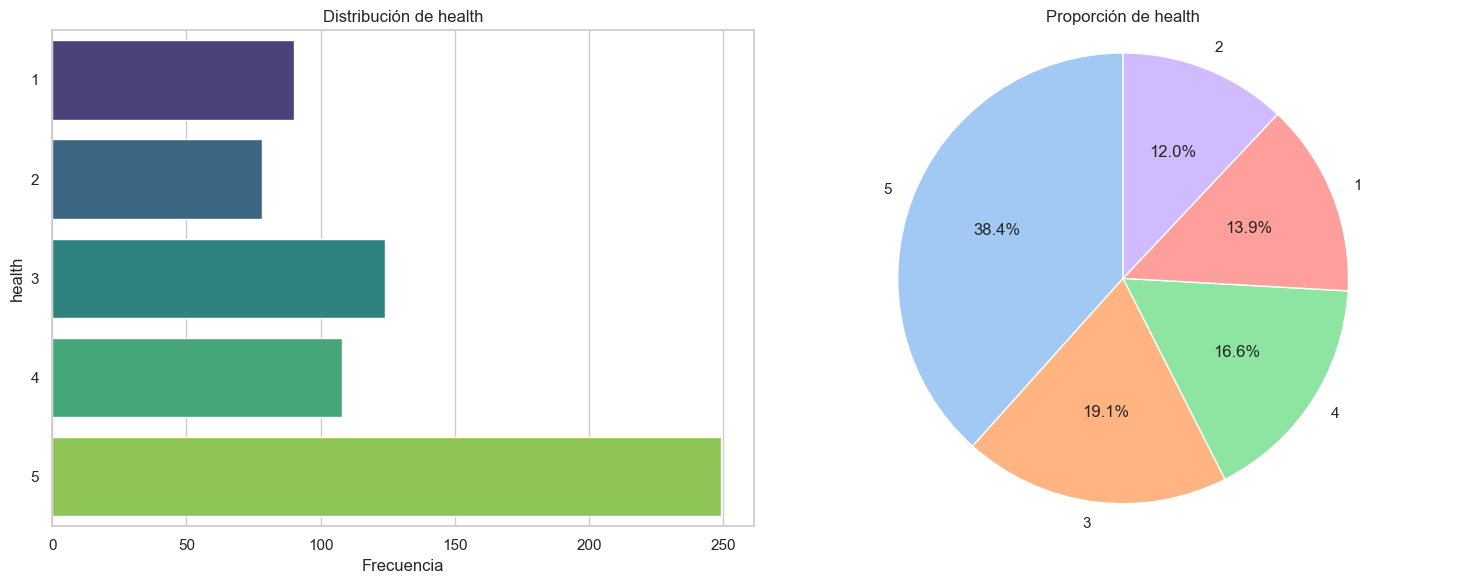

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumimos que df es tu DataFrame
# df = pd.read_csv('tus_datos.csv')

# Configuración estética
sns.set(style="whitegrid")

# Lista de variables categóricas (reemplaza con las tuyas)
variables_categoricas = ['sex','address', 'famsize', 'Pstatus','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
                        'activities','nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] 

# Función para crear gráficos de distribución categórica
def grafico_categorico(variable, max_categorias=10):
    # Crear figura con dos subplots
    plt.figure(figsize=(15, 6))
    
    # Gráfico de barras (countplot)
    plt.subplot(1, 2, 1)
    if X[variable].nunique() > max_categorias:
        # Si hay muchas categorías, mostrar solo las principales
        top_categories = X[variable].value_counts().nlargest(max_categorias).index
        data = X[X[variable].isin(top_categories)]
        sns.countplot(data=data, y=variable, order=top_categories, palette="viridis")
        plt.title(f'Top {max_categorias} categorías de {variable}')
    else:
        sns.countplot(data=X, y=variable, palette="viridis")
        plt.title(f'Distribución de {variable}')
    plt.xlabel('Frecuencia')
    
    # Gráfico de torta (solo si no hay muchas categorías)
    plt.subplot(1, 2, 2)
    if X[variable].nunique() <= 8:  # Solo hacer pie chart para pocas categorías
        counts = X[variable].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("pastel"))
        plt.title(f'Proporción de {variable}')
        plt.axis('equal')  # Para que el círculo sea perfecto
    else:
        plt.text(0.5, 0.5, f'Demasiadas categorías\n({X[variable].nunique()})', 
                ha='center', va='center')
        plt.axis('off')  # Ocultar ejes
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso para cada variable categórica
for variable in variables_categoricas:
    grafico_categorico(variable)

<Figure size 1000x600 with 0 Axes>

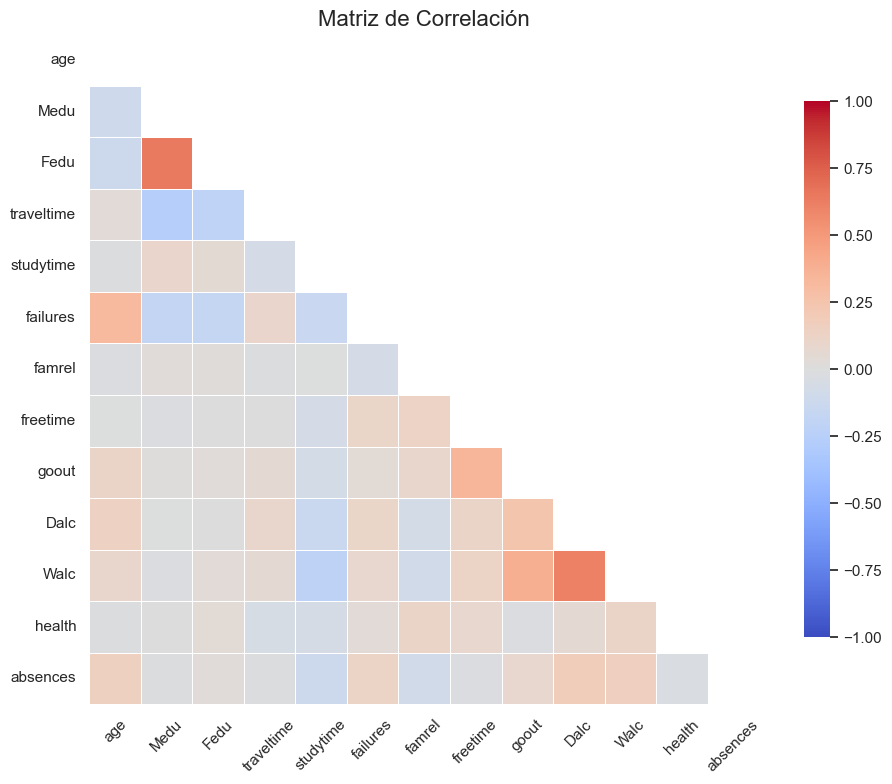

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración
sns.set(style="white")
plt.figure(figsize=(10, 6))

# --- 1. MATRIZ DE CORRELACIÓN (Para variables cuantitativas) ---
def matriz_correlacion(df, variables_cuantitativas):
    # Calcular matriz de correlación
    corr_matrix = df[variables_cuantitativas].corr(method='pearson')  # También puede ser 'spearman' o 'kendall'
    
    # Máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm",
                vmin=-1, 
                vmax=1,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .8})
    
    plt.title("Matriz de Correlación", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

matriz_correlacion(X, variables_cuantitativas)